# 知識點
- 常見的線性變換有：
    - 平移 (Translation)
    - 旋轉 (Rotation)
    - 鏡射 (Reflection)
    - 伸縮 (Stretching/ Squeezing)
    - 切變 (Shearing)
    
  詳細請參考 [幾何變換矩陣的設計](https://ccjou.wordpress.com/2011/03/22/%e8%ae%8a%e6%8f%9b%e7%9f%a9%e9%99%a3%e7%9a%84%e8%a8%ad%e8%a8%88/)
  
  
- 仿射變換 ＝ 線性變換 + 平移 <br>
    仿射不一定會保持物體的面積與大小，但是具有以下兩種特性：
    - 共線不變性：平行的線經過轉換後還是會平行
    - 比例不變性：兩點的中點經過轉換還會是中點
    
  詳細請參考 [仿射變換](https://ccjou.wordpress.com/2011/03/24/%e4%bb%bf%e5%b0%84%e8%ae%8a%e6%8f%9b/)
  
  
- 仿射變換的另一個觀點為"只要有一對圖片包含三組點就可以直接建構出矩陣"<br>
    也就是說，當 A 圖的三個點 (p1, p2, p3) 對應到 B 圖的三個點 (p1’, p2’, p3’) 可以將仿射變換的一般式改寫為
    
    $$\mathbf{T(x)=Ax+b} \rightarrow T(x, y)=(ax+by+c, dx+ey+f)$$
    
    也就是說求解矩陣
    $$\begin{bmatrix}
A_1 & A_2 & 1 & 0 & 0 & 0\\ 
0 & 0 & 0 & A_1 & A_2  & 1\\ 
B_1 & B_2 & 1 & 0 & 0 & 0\\ 
0 & 0 & 0 & B_1 & B_2  & 1\\ 
C_1 & C_2 & 1 & 0 & 0 & 0\\ 
0 & 0 & 0 & C_1 & C_2  & 1\\ 
\end{bmatrix}
\begin{bmatrix}
a\\ 
b\\ 
c\\ 
d\\ 
e\\ 
f
\end{bmatrix}
= 
\begin{bmatrix}
A_1'\\ 
A_2'\\ 
B_1'\\ 
B_2'\\ 
C_1'\\ 
C_2'
\end{bmatrix}$$
    即可。
    
    
- 實作請參考 [Affine Transformation
¶](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#affine-transformation)

## 實作演練
練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.png')

Rotation Matrix
[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]
Translation Matrix
[[  1.   0. 100.]
 [  0.   1. -50.]]


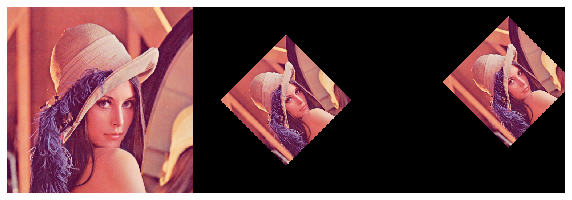

In [2]:
rows, cols, ch = img.shape

# 取得旋轉矩陣，使用 getRotationMatrix2D(center, angle, scale)
M_rotation = cv2.getRotationMatrix2D((cols*0.5, rows*0.5), 45, 0.5)
print('Rotation Matrix', M_rotation, sep='\n')

# 取得平移矩陣
M_translation = np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32)
print('Translation Matrix', M_translation, sep='\n')

# 旋轉
img_rotated = cv2.warpAffine(img, M_rotation, (cols, rows))

# 平移
img_rotate_trans = cv2.warpAffine(img_rotated, M_translation, (cols, rows))

# 組合 + 顯示圖片
img_show_rotate_trans = np.hstack((img, img_rotated, img_rotate_trans))
img_show_rotate_trans = cv2.cvtColor(img_show_rotate_trans, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img_show_rotate_trans)
plt.axis('off');

# 作業
直接建構仿射矩陣 (圖片至少包含 3 個點以上的 pair)

## Affine Transformation - Case 2: any three point
> cv2.getAffineTransform (譬如：圖片1的點，圖片2的點，input 應該包含兩張對應圖片的點)

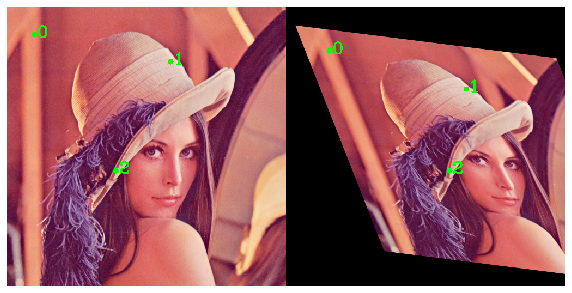

In [3]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
M_affine = cv2.getAffineTransform(pt1, pt2)
img_affine = cv2.warpAffine(img, M_affine, (cols,rows))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 5, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 5, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
img_show_affine = cv2.cvtColor(img_show_affine, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(img_show_affine)
plt.axis('off');